Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

Data Collection

In [ ]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/content/winequality.csv')

In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape

(150, 12)

In [ ]:
# first 5 rows of the dataset
wine_dataset.head()

,fa,vc,ca,rs,ch,fsd,tsd,den,pH,sul,alch,qua
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [ ]:
# checking for missing values
wine_dataset.isnull().sum()

fa      0
vc      0
ca      0
rs      0
ch      0
fsd     0
tsd     0
den     0
pH      0
sul     0
alch    0
qua     0
dtype: int64

Data Analysis and Visulaization

In [ ]:
# statistical measures of the dataset
wine_dataset.describe()

,fa,vc,ca,rs,ch,fsd,tsd,den,pH,sul,alch,qua
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,7.604000,0.574833,0.209067,2.306667,0.099320,15.54000,58.640000,0.99662,3.337267,0.687667,9.860667,5.293333
std,1.054608,0.183552,0.175841,1.141377,0.066494,9.71723,36.606795,0.00122,0.159436,0.263603,0.878291,0.619013
min,4.600000,0.220000,0.000000,1.200000,0.045000,3.00000,10.000000,0.99160,2.930000,0.390000,9.000000,4.000000
25%,7.025000,0.450000,0.070000,1.800000,0.074250,9.00000,29.250000,0.99620,3.230000,0.550000,9.400000,5.000000
50%,7.750000,0.560000,0.180000,2.000000,0.082000,13.00000,52.000000,0.99680,3.340000,0.600000,9.500000,5.000000
75%,8.175000,0.670000,0.300000,2.300000,0.093750,19.00000,84.500000,0.99720,3.420000,0.747500,10.100000,6.000000
max,11.200000,1.330000,0.700000,10.700000,0.467000,52.00000,153.000000,0.99930,3.900000,1.980000,14.000000,7.000000


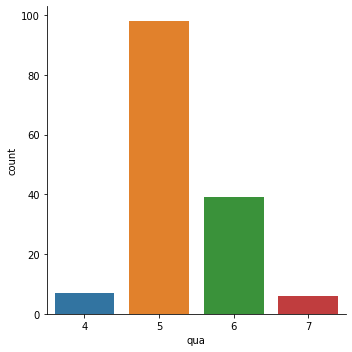

In [ ]:
# number of values for each quality
sns.catplot(x='qua', data = wine_dataset, kind = 'count')

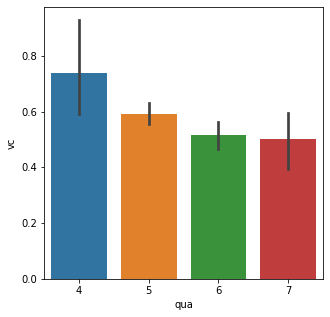

In [ ]:
# volatile acidity as vc vs Quality as qua
plot = plt.figure(figsize=(5,5))
sns.barplot(x='qua', y = 'vc', data = wine_dataset)

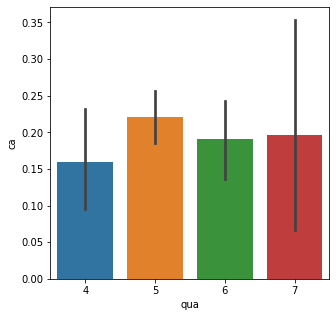

In [ ]:
# citric acid as ca vs Quality as qua
plot = plt.figure(figsize=(5,5))
sns.barplot(x='qua', y = 'ca', data = wine_dataset)

Correlation

1.Positive Correlation

2.Negative Correlation

In [ ]:
correlation = wine_dataset.corr()

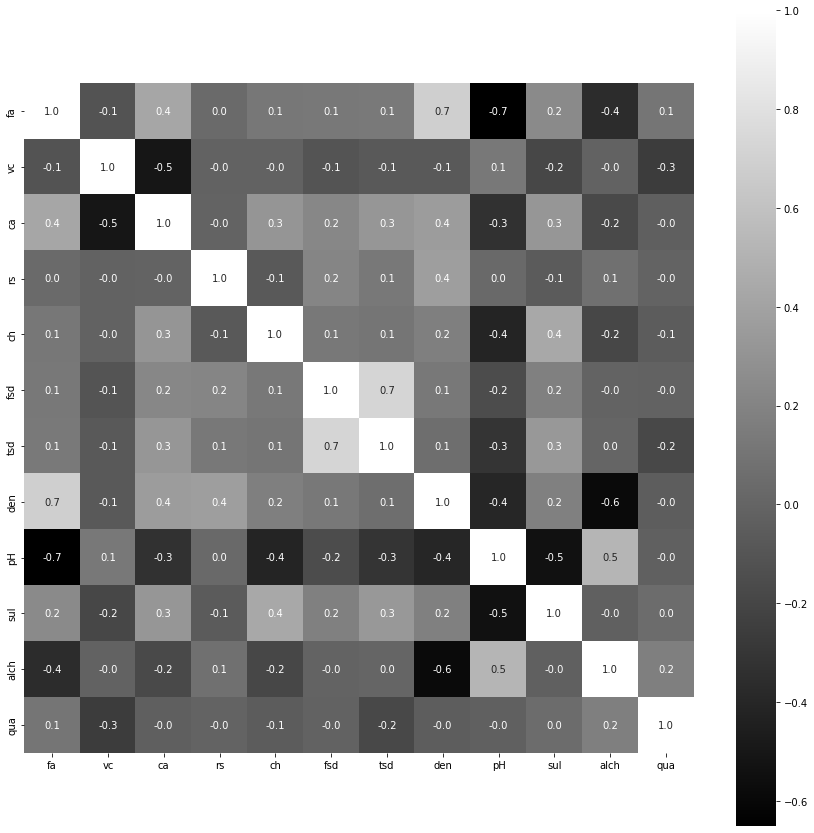

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'gray')

Data Preprocessing

In [ ]:
# separate the data and Label
X = wine_dataset.drop('qua',axis=1)

In [ ]:
print(X)

       fa    vc    ca   rs     ch  fsd  tsd     den    pH   sul  alch
0     7.4  0.70  0.00  1.9  0.076   11   34  0.9978  3.51  0.56   9.4
1     7.8  0.88  0.00  2.6  0.098   25   67  0.9968  3.20  0.68   9.8
2     7.8  0.76  0.04  2.3  0.092   15   54  0.9970  3.26  0.65   9.8
3    11.2  0.28  0.56  1.9  0.075   17   60  0.9980  3.16  0.58   9.8
4     7.4  0.70  0.00  1.9  0.076   11   34  0.9978  3.51  0.56   9.4
..    ...   ...   ...  ...    ...  ...  ...     ...   ...   ...   ...
145   8.1  0.67  0.55  1.8  0.117   32  141  0.9968  3.17  0.62   9.4
146   5.8  0.68  0.02  1.8  0.087   21   94  0.9944  3.54  0.52  10.0
147   7.6  0.49  0.26  1.6  0.236   10   88  0.9968  3.11  0.80   9.3
148   6.9  0.49  0.10  2.3  0.074   12   30  0.9959  3.42  0.58  10.2
149   8.2  0.40  0.44  2.8  0.089   11   43  0.9975  3.53  0.61  10.5

[150 rows x 11 columns]


Label Binarizaton

In [ ]:
Y = wine_dataset['qua'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [ ]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
145    0
146    0
147    0
148    1
149    1
Name: qua, Length: 150, dtype: int64


Train & Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(150,) (120,) (30,)


Model Training :

Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8333333333333334


Recall Score

In [ ]:
# recall on test data
X_test_prediction = model.predict(X_test)
test_data_recall = recall_score(X_test_prediction, Y_test)

In [ ]:
print('Recall : ', test_data_recall)

Recall :  0.75


Precision Score

In [ ]:
# precision on test data
X_test_prediction = model.predict(X_test)
test_data_precision = precision_score(X_test_prediction, Y_test)

In [ ]:
print('Precision : ', test_data_precision)

Precision :  0.42857142857142855


Confusion Matrix

In [ ]:
# Confusion Matrix on test data
X_test_prediction = model.predict(X_test)
test_data_confusion_matrix = confusion_matrix(X_test_prediction, Y_test)

In [ ]:
print('Confusion Matrix : ', 
      test_data_confusion_matrix)

Confusion Matrix :  [[22  4]
 [ 1  3]]


Mean Absolute Error

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_mean_absolute_error = mean_absolute_error(X_test_prediction, Y_test)

In [ ]:
print('Mean Absolute Error : ', 
      test_data_mean_absolute_error)

Mean Absolute Error :  0.16666666666666666


Model Training :

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.7666666666666667


Recall Score

In [ ]:
# recall on test data
X_test_prediction = model.predict(X_test)
test_data_recall = recall_score(X_test_prediction, Y_test)

In [ ]:
print('Recall : ', test_data_recall)

Recall :  0.5


Precision Score

In [ ]:
# precision on test data
X_test_prediction = model.predict(X_test)
test_data_precision = precision_score(X_test_prediction, Y_test)

In [ ]:
print('Precision : ', test_data_precision)

Precision :  0.42857142857142855


Confusion Matrix

In [ ]:
# Confusion Matrix on test data
X_test_prediction = model.predict(X_test)
test_data_confusion_matrix = confusion_matrix(X_test_prediction, Y_test)

In [ ]:
print('Confusion Matrix : ', 
      test_data_confusion_matrix)

Confusion Matrix :  [[20  4]
 [ 3  3]]


Mean Absolute Error

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_mean_absolute_error = mean_absolute_error(X_test_prediction, Y_test)

In [ ]:
print('Mean Absolute Error : ', 
      test_data_mean_absolute_error)

Mean Absolute Error :  0.23333333333333334


Building a Predictive System

In [ ]:
input_data = (7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine
